# Свёрточная сеть для классификации изображений:

In [10]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


# Импорт библиотек:

In [14]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras import layers
from keras.utils import np_utils

# для повторяемости результатов
np.random.seed(42)

# Загрузка данных для обучения и тестов:


In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
#подготовка данных
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_test /= 255.
x_train /= 255.

# преобразуем метки классов в категирии
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [18]:
x_train.shape, y_train.shape


((50000, 32, 32, 3), (50000, 10))

# Создание слоёв сети:

In [19]:
# Создание модели
model = Sequential()

# input
model.add(layers.Input(shape=(32, 32, 3)))

# первый слой свёртки
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))

# второй слой свёртки
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))

# слой подвыборки
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# слой регуляризайии
model.add(layers.Dropout(0.25))


# первый слой свёртки
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))

# второй слой свёртки
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))

# слой подвыборки
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# слой регуляризайии
model.add(layers.Dropout(0.25))



# преобразование из 2Д в 1Д вид
model.add(layers.Flatten())

# полносвязный слой
model.add(layers.Dense(512, activation='relu'))

# слой регуляции
model.add(layers.Dropout(0.5))

# выходной слой
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [20]:
# help(model.fit)
print(model.summary())
print(x_train.shape)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

# Обучение сети:

In [13]:
model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.1, shuffle=True, verbose=1)

Epoch 1/25
1407/1407 [==============================] - 68s 49ms/step - loss: 2.0506 - accuracy: 0.2445 - val_loss: 1.9176 - val_accuracy: 0.2980
Epoch 2/25
1407/1407 [==============================] - 69s 49ms/step - loss: 1.7323 - accuracy: 0.3647 - val_loss: 1.7222 - val_accuracy: 0.3720
Epoch 3/25
1407/1407 [==============================] - 70s 50ms/step - loss: 1.5913 - accuracy: 0.4163 - val_loss: 1.4803 - val_accuracy: 0.4508
Epoch 4/25
1407/1407 [==============================] - 68s 48ms/step - loss: 1.4846 - accuracy: 0.4613 - val_loss: 1.4653 - val_accuracy: 0.4740
Epoch 5/25
1407/1407 [==============================] - 67s 48ms/step - loss: 1.4034 - accuracy: 0.4938 - val_loss: 1.3917 - val_accuracy: 0.4886
Epoch 6/25
1407/1407 [==============================] - 69s 49ms/step - loss: 1.3410 - accuracy: 0.5178 - val_loss: 1.4365 - val_accuracy: 0.4740
Epoch 7/25
1407/1407 [==============================] - 66s 47ms/step - loss: 1.2850 - accuracy: 0.5408 - val_loss: 1.2275 -

# Сохраняем модель:

In [15]:
model.save('my_model.h5')

# Загружаем модель:

In [21]:
from keras.models import load_model
model = load_model('my_model.h5')
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Проверка качества обучения:

In [22]:
# проверка качества обучения на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=0)

# печать точности
print("Точносто работы на тестовых данных:%2.2f%%" % (scores[1], ))

Точносто работы на тестовых данных:0.74%


# Тест работы:

class_num:4 name:deer


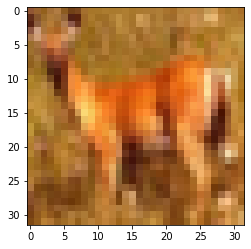

In [23]:
import matplotlib.pyplot as plt
test_img = x_test[110]
imgplot = plt.imshow(test_img)

# предсказание
prediction = model.predict(test_img.reshape((1, 32, 32, 3)))

#выводим номер класса
class_num = np.argmax(prediction[0])
class_name = classes[class_num]
#выводим правильный номер класса
print('class_num:%d name:%s' % (class_num, class_name))

# Opencv тест:

In [24]:
import numpy as np
import cv2
import random
random.seed(1)
cap = cv2.VideoCapture(0)
# cap.set(3, 32)
# cap.set(4, 32)
font = cv2.FONT_HERSHEY_SIMPLEX
counter = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # make prediction of image class
    prediction = model.predict(cv2.resize(frame, (32,32)).reshape((1, 32, 32, 3)))

    #выводим номер класса
    class_num = np.argmax(prediction[0])
    class_name = classes[class_num]

    # draw calass name
    cv2.putText(frame, '%s' % (class_name, ), (0,30), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()